In [1]:
#import modules
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import pandas as pd
import math

In [2]:
#parse PDB
df = pd.DataFrame(columns=["Bead_no","Bead_name","Residue","Chain_id","Residue_num","x","y","z",
                           "mass","charge","isOverhang"])
Bead_no = []
Bead_name = []
Residue = []
Chain_id = []
charge = []
mass = []
Residue_num = []
x = []
y = []
z = []
path="/home/subhasree/IISC_Bangalore/My_PhD_Studies/Lab_work/oralcancer_mirna_3d/pdb/miR1273p/miR1273p_CG.pdb"
with open(path) as f:
    for line in f.read().split("\n"):
        if(line.split()[0] == "TER"):
            break
        Bead_no.append(line.split()[1])
        Bead_name.append(line.split()[2])
        Residue.append(line.split()[3])
        Chain_id.append(line.split()[4])
        Residue_num.append(line.split()[5])
        x.append(line.split()[6])
        y.append(line.split()[7])
        z.append(line.split()[8])
        mass.append(line.split()[9])
        charge.append(line.split()[10])
    df["Bead_no"] = Bead_no
    df["Bead_name"] = Bead_name
    df["Residue"] = Residue
    df["Chain_id"] = Chain_id
    df["Residue_num"] = Residue_num
    df["x"] = x
    df["y"] = y
    df["z"] = z
    df["charge"] = charge
    df["mass"] = mass
    df["isOverhang"] = "No"    

In [3]:
len(Residue)

140

In [4]:
#looking at data
df[:5]

,Bead_no,Bead_name,Residue,Chain_id,Residue_num,x,y,z,mass,charge,isOverhang
0,1,BB2,U,A,1,1.944,-0.396,-0.104,1.00,0.00,No
1,2,BB3,U,A,1,1.475,-0.951,2.413,1.00,0.00,No
2,3,USC1,U,A,1,-0.474,0.972,0.592,1.00,0.00,No
3,4,USC2,U,A,1,-1.990,1.122,2.308,1.00,0.00,No
4,5,USC3,U,A,1,-2.997,1.318,-0.404,1.00,0.00,No


#### older implementation

In [170]:
#build a spine for ssRNA using only BB1, BB2, BB3
spline = []
beads = [[float(df['x'][0]),float(df['y'][0]),float(df['z'][0])]]
for i in range(1,len(df['Residue_num'])):
    if (df['Residue_num'][i] == df['Residue_num'][i-1]):
        if (df['Bead_name'][i] in ['BB1','BB2','BB3']):
            beads.append([float(df['x'][i]),float(df['y'][i]),float(df['z'][i])])
    else:
        spline.append(centroid(beads))
        beads = []
        if(df['Bead_name'][i] in ['BB1','BB2','BB3']):
            beads.append([float(df['x'][i]),float(df['y'][i]),float(df['z'][i])])
spline.append(centroid(beads))
print(spline)

[[16.673, 0.952, 18.063], [17.136, -1.876, 14.081], [16.631, -7.064, 10.631], [13.166, -10.983, 9.617], [8.328, -13.078, 9.736], [2.452, -13.006, 10.669], [-2.542, -11.852, 11.531], [-7.036, -8.141, 12.203], [-9.531, -2.442, 11.274], [-10.287, 2.194, 8.36], [-9.051, 4.644, 3.246], [-7.639, 3.657, -2.399], [-6.963, -0.028, -6.903], [-7.473, -1.274, -11.412], [-12.62, 0.39, -14.105], [-15.968, 4.719, -16.671], [-17.197, 8.645, -20.57], [-15.722, 11.093, -25.541], [-11.99, 11.521, -30.189], [-8.028, 9.649, -33.552], [-4.423, 5.055, -34.687], [-0.893, 1.475, -26.312], [-0.641, 7.126, -25.524], [-2.309, 11.471, -23.134], [-5.742, 14.808, -20.06], [-9.029, 15.225, -15.838], [-10.483, 13.735, -10.632], [-8.381, 11.144, -6.336], [-3.377, 9.617, -3.673], [0.529, 4.062, -2.609], [3.099, 2.626, 0.271], [2.752, 5.562, 5.347], [1.975, 5.513, 11.47], [0.361, 2.832, 16.88], [0.5, -1.136, 20.273], [1.644, -6.904, 22.229], [4.903, -11.236, 22.719], [9.386, -15.68, 21.603], [15.149, -16.451, 20.281], [2

In [64]:
# #build a spine for ssRNA
# spline = []
# beads = [[float(df['x'][0]),float(df['y'][0]),float(df['z'][0])]]
# for i in range(1,len(df['Residue_num'])):
#     if (df['Residue_num'][i] == df['Residue_num'][i-1]):
# #         if (df['Bead_name'][i] in ['BB1','BB2','BB3']):
#         beads.append([float(df['x'][i]),float(df['y'][i]),float(df['z'][i])])
#     else:
#         spline.append(centroid(beads))
#         beads = []
# #         if(df['Bead_name'][i] in ['BB1','BB2','BB3']):
#         beads.append([float(df['x'][i]),float(df['y'][i]),float(df['z'][i])])
# spline.append(centroid(beads))
# print(spline)

[[20.284, -0.117, -10.159], [17.871, -1.626, -7.119], [15.313, -1.892, -3.382], [13.165, 1.169, 0.29], [9.953, 3.775, 1.95], [6.596, 7.319, 1.373], [2.945, 9.46, -1.974], [-1.899, 11.64, -5.755], [-6.699, 10.956, -6.833], [-11.384, 8.459, -9.299], [-15.541, 4.447, -8.557], [-18.858, 2.54, -6.409], [-20.528, 0.78, -2.373], [-20.953, 1.392, 1.888], [-21.783, 3.284, 6.358], [-15.288, 4.653, 12.401], [-11.496, 0.423, 9.312], [-9.736, -2.467, 5.393], [-9.695, -4.531, 1.015], [-9.897, -4.083, -3.795], [-9.605, -0.557, -7.749], [-7.179, 2.677, -10.808], [-3.617, 5.426, -11.682], [1.239, 4.385, -13.944], [5.796, 8.061, -12.079], [8.706, 10.748, -8.3], [11.717, 11.693, -4.76], [15.186, 11.338, -1.881], [18.287, 7.616, 0.176], [21.703, 4.632, 0.535], [24.592, 0.99, -1.525], [16.667, -0.674, -8.425], [19.397, -0.224, -3.303], [18.219, -1.006, 0.133], [9.558, 6.979, 0.687], [4.85, 11.102, -0.499], [-1.464, 9.675, -7.935], [-4.731, 8.153, -11.517], [-12.15, 7.218, -10.972], [-15.196, 0.378, -6.244]

### Current spine implementation

In [130]:
#get the boundary points
#dsRNA [neighbour density method]
# points = []
# for i in range(0,len(df['x'])):
#     points.append([float(df['x'][i]),float(df['y'][i]),float(df['z'][i])])
# boundary_points = []
# for pt in points:
#     density_of_point = find_neighbour_density(pt,points)
#     print(density_of_point)
#     if(density_of_point['count']<15):
#         boundary_points.append(pt)

In [11]:
#some initizlization for plotting
#get the x,y,z coordinates, molecule data
x = np.array([float(item) for item in df['x']])
y = np.array([float(item) for item in df['y']])
z = np.array([float(item) for item in df['z']])
#initialize empty arrays to plot boundary data
bx = []
by = []
bz = []

In [12]:
#build a spine for ssRNA using only BB1, BB2, BB3
#get the boundary points
# spline = []
# boundary_points = []
# beads = [[float(df['x'][0]),float(df['y'][0]),float(df['z'][0])]]
# for i in range(1,len(df['Residue_num'])):
#     if (df['Residue_num'][i] == df['Residue_num'][i-1]):
#         if (df['Bead_name'][i] in ['BB1','BB2','BB3']):
#             boundary_points.append([float(df['x'][i]),float(df['y'][i]),float(df['z'][i])])
   

In [13]:
#get the boundary points
points = []
for i in range(0,len(df['x'])):
    points.append([float(df['x'][i]),float(df['y'][i]),float(df['z'][i])])
boundary_points = []
for pt in points:
    density_of_point = find_neighbour_density(pt,points)
    print(density_of_point)
    if(density_of_point['count']<15):
        boundary_points.append(pt)

{'Point': [1.944, -0.396, -0.104], 'count': 6}
{'Point': [1.475, -0.951, 2.413], 'count': 10}
{'Point': [-0.474, 0.972, 0.592], 'count': 14}
{'Point': [-1.99, 1.122, 2.308], 'count': 18}
{'Point': [-2.997, 1.318, -0.404], 'count': 14}
{'Point': [1.504, -4.33, 1.454], 'count': 10}
{'Point': [0.579, -4.463, 4.555], 'count': 11}
{'Point': [-0.88, -5.771, 6.428], 'count': 11}
{'Point': [-2.27, -4.395, 3.961], 'count': 17}
{'Point': [-4.341, -3.79, 4.745], 'count': 20}
{'Point': [-4.075, -4.342, 1.893], 'count': 17}
{'Point': [0.233, -8.952, 5.826], 'count': 10}
{'Point': [-2.345, -8.992, 7.998], 'count': 12}
{'Point': [-4.11, -10.89, 8.352], 'count': 12}
{'Point': [-6.03, -8.706, 6.545], 'count': 19}
{'Point': [-9.05, -8.893, 6.737], 'count': 16}
{'Point': [-8.269, -7.817, 4.105], 'count': 20}
{'Point': [-5.447, -8.127, 5.138], 'count': 18}
{'Point': [-2.202, -13.4, 7.166], 'count': 10}
{'Point': [-5.332, -14.159, 7.927], 'count': 13}
{'Point': [-7.219, -15.826, 7.063], 'count': 12}
{'Poin

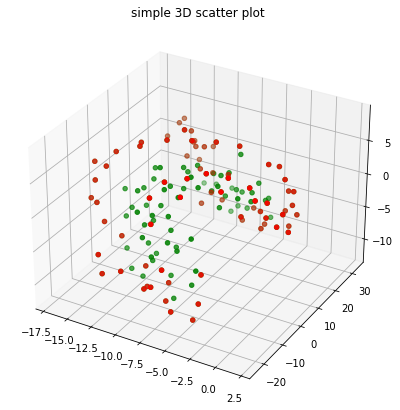

In [14]:
#plot molecule with its boundary points
for i in range(0,len(boundary_points)):
    np.array(bx.append(boundary_points[i][0]))
    np.array(by.append(boundary_points[i][1]))
    np.array(bz.append(boundary_points[i][2]))

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(x,y,z, color = "green")
ax.scatter3D(bx,by,bz, color = "red")
plt.title("simple 3D scatter plot")
plt.show()

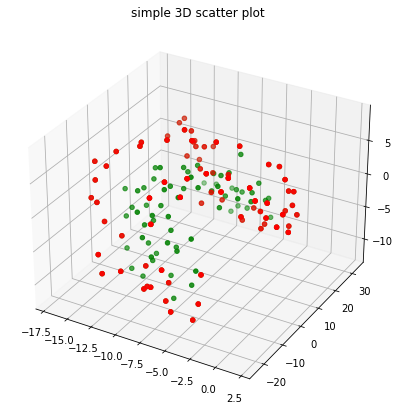

In [15]:
#plot molecule with its boundary points
for i in range(0,len(boundary_points)):
    np.array(bx.append(boundary_points[i][0]))
    np.array(by.append(boundary_points[i][1]))
    np.array(bz.append(boundary_points[i][2]))

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(x,y,z, color = "green")
ax.scatter3D(bx,by,bz, color = "red")
plt.title("simple 3D scatter plot")
plt.show()

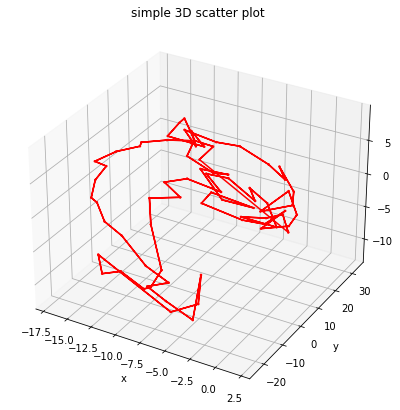

In [16]:
# Just the boundary plot 
fig2 = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# ax.scatter3D(x,y,z, color = "green")
ax.scatter3D(bx,by,bz, color = "red",s=2)
plt.title("simple 3D scatter plot")
ax.plot(bx,by,bz,color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [17]:
#get spline data
spline = []
bndry_pts = boundary_points[:]
total_points_length = len(bndry_pts)
# for i in range(0,total_points_length):
i = 0
while i<len(bndry_pts):
    neighbours_array = []
    #thee is thy's first neighbour
    neighbours_array.append(bndry_pts[i])
#     print(i)
#     for j,val in enumerate(bndry_pts[i+1:]):
    j = i+1
    while(j<len(bndry_pts)):
        dis = distance(bndry_pts[i],bndry_pts[j])
#         print(dis)
        if(dis<15):
            neighbours_array.append(bndry_pts[j])
            del bndry_pts[j]
            total_points_length = total_points_length - 1
        j = j+1
#     if(len(centroid_array)>0):
    if(len(neighbours_array)>=3):
        print(neighbours_array)
        #calculate centroid for the neighbours
        centre = centroid(neighbours_array)
#         print(centre)
        spline.append(centroid(neighbours_array))
#         print(spline)
    i = i+1

[[1.944, -0.396, -0.104], [1.475, -0.951, 2.413], [-2.997, 1.318, -0.404], [0.579, -4.463, 4.555], [0.233, -8.952, 5.826], [-4.11, -10.89, 8.352], [-10.375, 1.13, 7.841], [-6.328, 5.687, 8.095], [-1.832, 9.491, 5.762], [0.004, 13.328, 1.625], [-2.864, 11.122, -1.991]]
[[-0.474, 0.972, 0.592], [1.504, -4.33, 1.454], [-2.345, -8.992, 7.998], [-12.627, -1.383, 6.642], [-8.129, 2.457, 8.335], [-4.83, 10.126, 7.076], [-1.544, 13.82, 4.555]]
[[-0.88, -5.771, 6.428], [-2.202, -13.4, 7.166], [-7.219, -15.826, 7.063], [-8.179, -18.455, 5.031], [-15.109, -6.263, 3.878], [-14.845, -2.561, 5.262], [-9.48, 5.55, 8.669]]
[[-5.332, -14.159, 7.927], [-5.151, -18.467, 6.417], [-6.068, -23.312, -3.246], [-3.612, -16.103, -4.749], [-15.431, -9.748, -0.795], [-16.055, -7.419, 1.721]]
[[-7.312, -22.152, 2.551], [-7.176, -23.346, -6.275], [-10.27, -22.892, -5.447], [-12.439, -23.332, -3.823], [-3.777, -16.648, -9.023]]
[[-8.265, -21.392, -7.557], [-12.201, -22.846, -6.688], [-4.566, -15.461, -12.151], [-9.7

[[-2.206, 1.493, 3.815], [-4.064, 1.81, 5.236], [-8.273, -8.104, 6.214], [-8.608, -14.868, 1.212], [-8.195, -21.674, -4.403], [-9.968, -15.426, -7.988], [-4.802, 16.746, -1.716], [-6.775, 21.184, -2.673], [-9.646, 23.971, -2.468], [-12.521, 27.684, -0.802]]


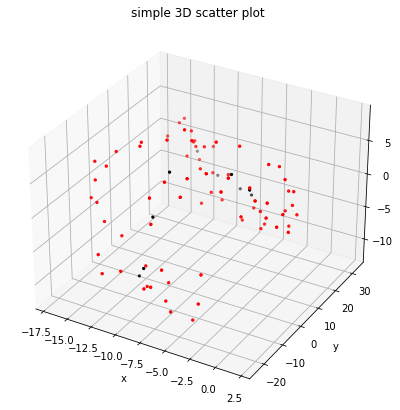

In [18]:
#Plot spine of molecule
#initialize arrays to plot the spine coordinates - centroidal axis
spline_x = []
spline_y = []
spline_z = []

print(spline)
for i in range(0,len(spline)):
    np.array(spline_x.append(spline[i][0]))
    np.array(spline_y.append(spline[i][1]))
    np.array(spline_z.append(spline[i][2]))
fig3 = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
# ax.scatter3D(x,y,z, color = "green")
ax.scatter3D(bx,by,bz, color = "red",s=5)
ax.scatter3D(spline_x,spline_y,spline_z, color = "black",linestyle='-',s=5)
# ax.plot(spline_x,spline_y,spline_z, color='black')

plt.title("simple 3D scatter plot")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [19]:
#print
# spline
i = 140
j = 23
for line in spline:
    print("ATOM    "+str(i)+" CENT P   G  "+str(j)+"       "+str(line[0])+"  "+str(line[1])+" "+str(line[2])+"  1.00  0.00")
    i=i+1
    j=j+1

ATOM    140 CENT P   G  23       -2.206  1.493 3.815  1.00  0.00
ATOM    141 CENT P   G  24       -4.064  1.81 5.236  1.00  0.00
ATOM    142 CENT P   G  25       -8.273  -8.104 6.214  1.00  0.00
ATOM    143 CENT P   G  26       -8.608  -14.868 1.212  1.00  0.00
ATOM    144 CENT P   G  27       -8.195  -21.674 -4.403  1.00  0.00
ATOM    145 CENT P   G  28       -9.968  -15.426 -7.988  1.00  0.00
ATOM    146 CENT P   G  29       -4.802  16.746 -1.716  1.00  0.00
ATOM    147 CENT P   G  30       -6.775  21.184 -2.673  1.00  0.00
ATOM    148 CENT P   G  31       -9.646  23.971 -2.468  1.00  0.00
ATOM    149 CENT P   G  32       -12.521  27.684 -0.802  1.00  0.00


#### Take only end points from spine and make a straight spine

In [20]:
#not necessary the end points in the spline list are the terminal points.
#add logic to detect end points == terminal points
p0 = spline[4]
pn = spline[9]
p1 = []
p2 = [] 
p3 = []
p4 = []
p5 = []
p6 = []
p7 = []

In [21]:
p0

[-8.195, -21.674, -4.403]

In [22]:
pn

[-12.521, 27.684, -0.802]

In [23]:
newspline = []
for i in range(0,3):
    p1.append(round (((p0[i]+pn[i])/2),2))
for i in range(0,3):
    p2.append(round(((p0[i]+p1[i])/2),2))
for i in range(0,3):
    p3.append(round(((p1[i]+pn[i])/2),2))
for i in range(0,3):
    p4.append(round(((p0[i]+p2[i])/2),2))
for i in range(0,3):
    p5.append(round(((p2[i]+p1[i])/2),2))
for i in range(0,3):
    p6.append(round(((p1[i]+p3[i])/2),2))
for i in range(0,3):
    p7.append(round(((p3[i]+pn[i])/2),2))
newspline.append(p0)
newspline.append(p1)
newspline.append(p2)
newspline.append(p3)
newspline.append(p4)
newspline.append(p5)
newspline.append(p6)
newspline.append(p7)
newspline.append(pn)

In [24]:
newspline

[[-8.195, -21.674, -4.403],
 [-10.36, 3.01, -2.6],
 [-9.28, -9.33, -3.5],
 [-11.44, 15.35, -1.7],
 [-8.74, -15.5, -3.95],
 [-9.82, -3.16, -3.05],
 [-10.9, 9.18, -2.15],
 [-11.98, 21.52, -1.25],
 [-12.521, 27.684, -0.802]]

In [25]:
# spline
i = 140
j = 23
for line in newspline:
    print("ATOM    "+str(i)+" CENT P   G  "+str(j)+"     "+str(line[0])+"  "+str(line[1])+" "+str(line[2])+"  1.00  0.00")
    i=i+1
    j=j+1

ATOM    140 CENT P   G  23     -8.195  -21.674 -4.403  1.00  0.00
ATOM    141 CENT P   G  24     -10.36  3.01 -2.6  1.00  0.00
ATOM    142 CENT P   G  25     -9.28  -9.33 -3.5  1.00  0.00
ATOM    143 CENT P   G  26     -11.44  15.35 -1.7  1.00  0.00
ATOM    144 CENT P   G  27     -8.74  -15.5 -3.95  1.00  0.00
ATOM    145 CENT P   G  28     -9.82  -3.16 -3.05  1.00  0.00
ATOM    146 CENT P   G  29     -10.9  9.18 -2.15  1.00  0.00
ATOM    147 CENT P   G  30     -11.98  21.52 -1.25  1.00  0.00
ATOM    148 CENT P   G  31     -12.521  27.684 -0.802  1.00  0.00


In [27]:
# Add these lines to molecule_0.itp

i = 104
j = 17
for line in newspline:
    print(str(i)+" "+"SPN  "+str(j)+" "+"P CENT "+str(i)+"  0.0")
    i=i+1
    j=j+1

104 SPN  17 P CENT 104  0.0
105 SPN  18 P CENT 105  0.0
106 SPN  19 P CENT 106  0.0
107 SPN  20 P CENT 107  0.0
108 SPN  21 P CENT 108  0.0
109 SPN  22 P CENT 109  0.0
110 SPN  23 P CENT 110  0.0
111 SPN  24 P CENT 111  0.0
112 SPN  25 P CENT 112  0.0


#### Midpoint method

In [268]:
#increase points in spine
newspline = []
for i in range(0,len(spline)-1):
    mdpt = get_midpoint(spline[i],spline[i+1])
    newspline.append(spline[i])
    newspline.append(mdpt)
    newspline.append(spline[i+1])

In [267]:
import math
def get_midpoint(A,B):
    mdpt = []
    i = (A[0]+B[0])/2
    j = (A[1]+B[1])/2
    k = (A[2]+B[2])/2
    mdpt.append(round(i,2))
    mdpt.append(round(j,2))
    mdpt.append(round(k,2))
    return mdpt

In [47]:
# spline
i = 113
j = 19
for line in newspline:
    print("ATOM    "+str(i)+" CENT P   G  "+str(j)+"     "+str(line[0])+"  "+str(line[1])+" "+str(line[2])+"  1.00  0.00")
    i=i+1
    j=j+1

ATOM    113 CENT P   G  19     -3.731  10.907 11.014  1.00  0.00
ATOM    114 CENT P   G  20     10.57  18.76 15.53  1.00  0.00
ATOM    115 CENT P   G  21     3.42  14.83 13.27  1.00  0.00
ATOM    116 CENT P   G  22     17.72  22.69 17.79  1.00  0.00
ATOM    117 CENT P   G  23     -0.16  12.87 12.14  1.00  0.00
ATOM    118 CENT P   G  24     7.0  16.8 14.4  1.00  0.00
ATOM    119 CENT P   G  25     14.14  20.73 16.66  1.00  0.00
ATOM    120 CENT P   G  26     21.3  24.66 18.92  1.00  0.00
ATOM    121 CENT P   G  27     24.876  26.622 20.048  1.00  0.00


##### ------------------------------------------------ Function definitions --------------------------------------------

In [7]:
def find_neighbour_density(point_A,set_of_points):
    neighbours = []
    for point_B in set_of_points:
        if(point_A != point_B):
            dis = distance(point_A,point_B)
            if(dis < 7):
                neighbours.append(set_of_points[i])
    return {"Point":point_A,"count":len(neighbours)}

In [8]:
def distance(point_A,point_B):
    x1 = float(point_A[0])
    y1 = float(point_A[1])
    z1 = float(point_A[2])
    x2 = float(point_B[0])
    y2 = float(point_B[1])
    z2 = float(point_B[2])
    dis = math.sqrt(math.pow((x1-x2),2) + math.pow((y1-y2),2) + math.pow((z1-z2),2) )
    return dis

In [9]:
def centroid(points):
    sum_x = 0.0
    sum_y = 0.0
    sum_z = 0.0
    l = float(len(points))
    for point in points:
        sum_x = sum_x + point[0]
        sum_y = sum_y + point[1]
        sum_z = sum_z + point[2]
    return [round((sum_x/l),3),round((sum_y/l),3),round((sum_z/l),3)]

In [10]:
def return_grid_coordinates(df):
    x_max = df['x'][0]
    y_max = df['y'][0]
    z_max = df['z'][0]

    x_min = df['x'][0]
    y_min = df['y'][0]
    z_min = df['z'][0]

    for value in df['x']:
        x_coordinate = float(value)
        if (x_coordinate > x_max):
            x_max = x_coordinate
    for value in df['y']:
        y_coordinate = float(value)
        if (y_coordinate > y_max):
            y_max = y_coordinate
    for value in df['z']:
        z_coordinate = float(value)
        if (z_coordinate > z_max):
            z_max = z_coordinate
    for value in df['x']:
        x_coordinate = float(value)
        if (x_coordinate < x_min):
            x_min = x_coordinate
    for value in df['y']:
        y_coordinate = float(value)
        if (y_coordinate < y_min):
            y_min = y_coordinate
    for value in df['z']:
        z_coordinate = float(value)
        if (z_coordinate < z_min):
            z_min = z_coordinate
    return ([x_min,x_max,y_min,y_max,z_min,z_max])